
**STOCK MARKET PREDICTION**

**DATASET**-https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df_index = pd.read_csv('/kaggle/input/stock-exchange-data/indexData.csv')
df_index

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [4]:
df_info=pd.read_csv("/kaggle/input/stock-exchange-data/indexInfo.csv")
df_info

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [5]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [6]:
print(df_index.dtypes)


Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [7]:
df_index.isna().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

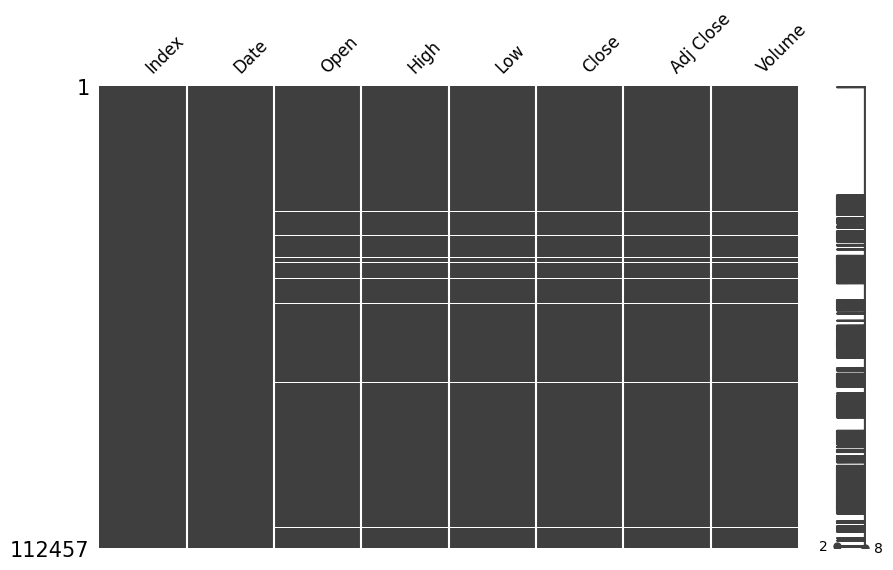

In [8]:
import missingno as msno
msno.matrix(df_index, figsize=(10, 6), fontsize=12)
plt.show()

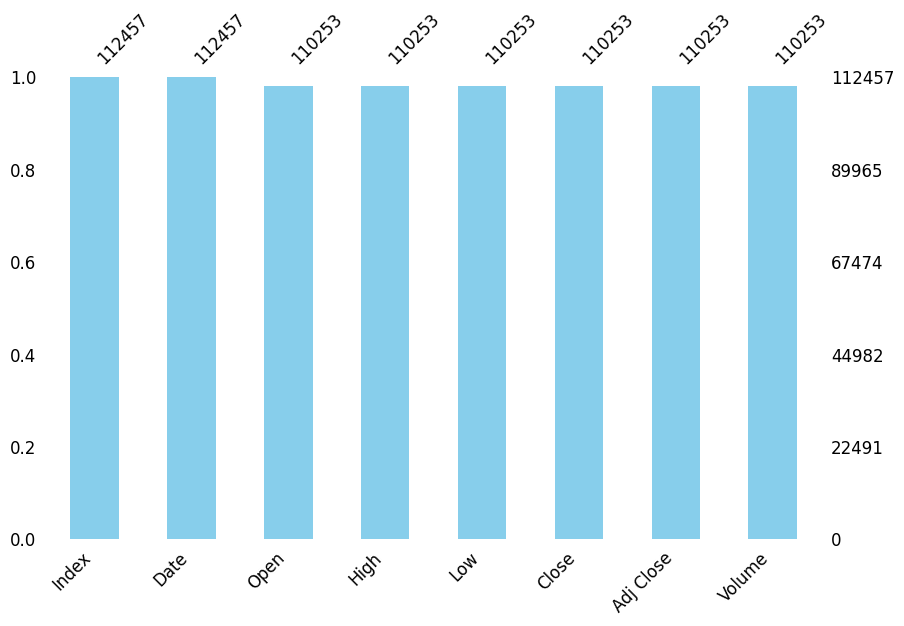

In [9]:
msno.bar(df_index, figsize=(10, 6), color='skyblue', fontsize=12)
plt.show()


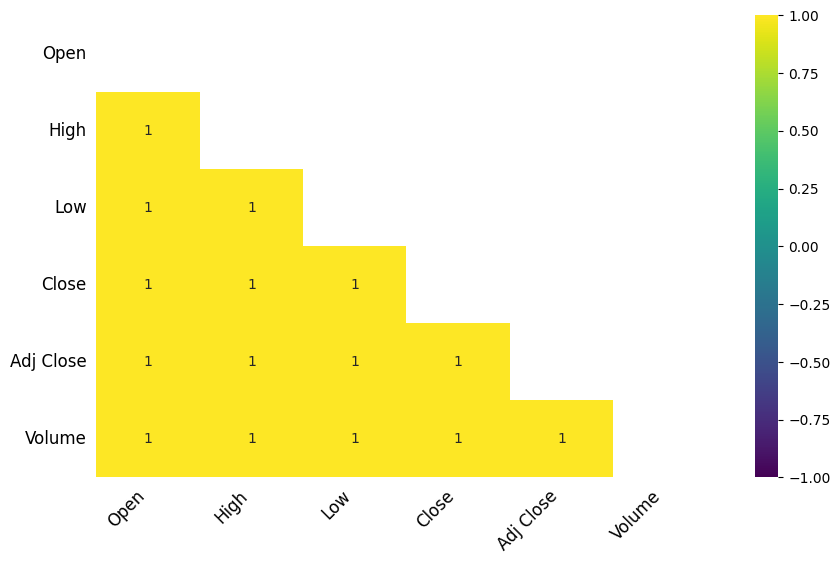

In [10]:
msno.heatmap(df_index, figsize=(10, 6), cmap="viridis", fontsize=12)
plt.show()


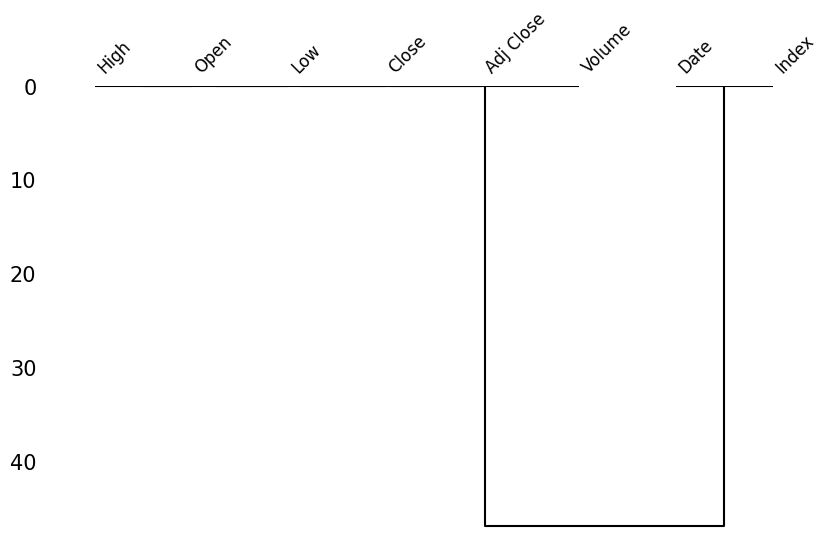

In [11]:
msno.dendrogram(df_index, figsize=(10, 6), fontsize=12)
plt.show()


In [12]:
# Example: Handling missing values
from sklearn.impute import SimpleImputer
number_cols=df_index.select_dtypes(include="number").columns
non_numeric_cols=df_index.select_dtypes(exclude="number").columns

In [13]:
numeric_imputer = SimpleImputer(strategy='mean')
df_index[number_cols] = numeric_imputer.fit_transform(df_index[number_cols])

# Impute missing values for non-numeric columns with the most frequent value
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df_index[non_numeric_cols] = non_numeric_imputer.fit_transform(df_index[non_numeric_cols])


In [14]:
df_index.isna().sum().sum()

0

In [15]:
df_index['Date'] = pd.to_datetime(df_index['Date'])

In [16]:
df_index['Price Change'] = df_index['Close'] - df_index['Open']  # Difference between Open and Close
df_index['Lag_Close'] = df_index['Close'].shift(1)

In [17]:
df_index.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Price Change', 'Lag_Close'],
      dtype='object')

In [18]:
df_index['Price Change']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
112452    5.949951
112453    7.130005
112454   -7.149902
112455    3.969971
112456    5.130005
Name: Price Change, Length: 112457, dtype: float64

**FEATURE ENGINEERING**

In [19]:
df = pd.merge(df_index, df_info, on="Index", how="left")
df.sort_values(by=['Index', 'Date'], ascending=[True, True]).head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency
35388,000001.SS,1997-07-02,1255.909058,1261.571045,1147.331055,1199.061035,1199.061035,0.0,-56.848023,29151.800780,China,Shanghai Stock Exchange,CNY
35389,000001.SS,1997-07-03,1194.676025,1194.676025,1149.939941,1150.623047,1150.623047,0.0,-44.052978,1199.061035,China,Shanghai Stock Exchange,CNY
35390,000001.SS,1997-07-04,1138.921021,1163.249023,1124.776001,1159.342041,1159.342041,0.0,20.421020,1150.623047,China,Shanghai Stock Exchange,CNY
35391,000001.SS,1997-07-07,1161.707031,1163.447021,1085.572021,1096.818970,1096.818970,0.0,-64.888061,1159.342041,China,Shanghai Stock Exchange,CNY
35392,000001.SS,1997-07-08,1092.798950,1115.432983,1066.043945,1109.666016,1109.666016,0.0,16.867066,1096.818970,China,Shanghai Stock Exchange,CNY


In [20]:
tmp_df = df.groupby('Index')['Date'].agg(['min', 'max'])

start_date = pd.to_datetime(max(tmp_df['min']))
end_date = pd.to_datetime(min(tmp_df['max']))

df['Date'] = pd.to_datetime(df['Date'])

# filter the datafrane
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency
11606,NYA,2012-02-08,8069.709961,8100.229980,8038.029785,8082.979980,8082.979980,4.096730e+09,13.270019,8069.700195,United States,New York Stock Exchange,USD
11607,NYA,2012-02-09,8082.979980,8107.240234,8045.549805,8081.250000,8081.250000,4.209890e+09,-1.729980,8082.979980,United States,New York Stock Exchange,USD
11608,NYA,2012-02-10,8081.250000,8081.250000,7964.390137,7992.049805,7992.049805,3.877580e+09,-89.200195,8081.250000,United States,New York Stock Exchange,USD
11609,NYA,2012-02-13,7992.029785,8065.439941,7992.029785,8056.229980,8056.229980,3.618040e+09,64.200195,7992.049805,United States,New York Stock Exchange,USD
11610,NYA,2012-02-14,8056.229980,8056.229980,7974.250000,8029.609863,8029.609863,3.889520e+09,-26.620117,8056.229980,United States,New York Stock Exchange,USD


In [21]:
# we will find the date intersection for each index
# due to the date avialable in each index are difference

unique_dates_by_index = df.groupby('Index')['Date'].unique()
common_dates = set(unique_dates_by_index.iloc[0]).intersection(*unique_dates_by_index)
df = df[df['Date'].isin(common_dates)].reset_index(drop=True, inplace=False)
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency
0,NYA,2012-02-08,8069.709961,8100.229980,8038.029785,8082.979980,8082.979980,4.096730e+09,13.270019,8069.700195,United States,New York Stock Exchange,USD
1,NYA,2012-02-09,8082.979980,8107.240234,8045.549805,8081.250000,8081.250000,4.209890e+09,-1.729980,8082.979980,United States,New York Stock Exchange,USD
2,NYA,2012-02-10,8081.250000,8081.250000,7964.390137,7992.049805,7992.049805,3.877580e+09,-89.200195,8081.250000,United States,New York Stock Exchange,USD
3,NYA,2012-02-13,7992.029785,8065.439941,7992.029785,8056.229980,8056.229980,3.618040e+09,64.200195,7992.049805,United States,New York Stock Exchange,USD
4,NYA,2012-02-14,8056.229980,8056.229980,7974.250000,8029.609863,8029.609863,3.889520e+09,-26.620117,8056.229980,United States,New York Stock Exchange,USD


In [22]:
# calculate price difference each date
df['Price Difference'] = df['Close'] - df['Open']
df.sort_values(by=['Index', 'Date'], ascending=[True, True]).head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency,Price Difference
5391,000001.SS,2012-02-08,2291.812012,2350.965088,2286.819092,2347.530029,2347.530029,87200.0,55.718017,2291.902100,China,Shanghai Stock Exchange,CNY,55.718017
5392,000001.SS,2012-02-09,2344.224121,2363.613037,2333.935059,2349.589111,2349.589111,98000.0,5.364990,2347.530029,China,Shanghai Stock Exchange,CNY,5.364990
5393,000001.SS,2012-02-10,2342.010986,2368.979004,2339.885010,2351.980957,2351.980957,96600.0,9.969971,2349.589111,China,Shanghai Stock Exchange,CNY,9.969971
5394,000001.SS,2012-02-13,2332.054932,2365.339111,2325.028076,2351.854004,2351.854004,86200.0,19.799072,2351.980957,China,Shanghai Stock Exchange,CNY,19.799072
5395,000001.SS,2012-02-14,2348.876953,2352.468994,2332.247070,2344.770996,2344.770996,73200.0,-4.105957,2351.854004,China,Shanghai Stock Exchange,CNY,-4.105957


In [23]:
df['Trade Direction'] = np.where(
    df['Price Difference'] > 0, 'Price Increase',
    np.where(
        df['Price Difference'] < 0, 'Price Decrease', 'Price Unchanged'
    )
)
df.sort_values(by=['Index', 'Date'], ascending=[True, True]).head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency,Price Difference,Trade Direction
5391,000001.SS,2012-02-08,2291.812012,2350.965088,2286.819092,2347.530029,2347.530029,87200.0,55.718017,2291.902100,China,Shanghai Stock Exchange,CNY,55.718017,Price Increase
5392,000001.SS,2012-02-09,2344.224121,2363.613037,2333.935059,2349.589111,2349.589111,98000.0,5.364990,2347.530029,China,Shanghai Stock Exchange,CNY,5.364990,Price Increase
5393,000001.SS,2012-02-10,2342.010986,2368.979004,2339.885010,2351.980957,2351.980957,96600.0,9.969971,2349.589111,China,Shanghai Stock Exchange,CNY,9.969971,Price Increase
5394,000001.SS,2012-02-13,2332.054932,2365.339111,2325.028076,2351.854004,2351.854004,86200.0,19.799072,2351.980957,China,Shanghai Stock Exchange,CNY,19.799072,Price Increase
5395,000001.SS,2012-02-14,2348.876953,2352.468994,2332.247070,2344.770996,2344.770996,73200.0,-4.105957,2351.854004,China,Shanghai Stock Exchange,CNY,-4.105957,Price Decrease


In [24]:
df = df.sort_values(by=['Index', 'Date'], ascending=[True, True])
df['Cum Price Difference'] = df.groupby('Index')['Price Difference'].cumsum()
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency,Price Difference,Trade Direction,Cum Price Difference
5391,000001.SS,2012-02-08,2291.812012,2350.965088,2286.819092,2347.530029,2347.530029,87200.0,55.718017,2291.902100,China,Shanghai Stock Exchange,CNY,55.718017,Price Increase,55.718017
5392,000001.SS,2012-02-09,2344.224121,2363.613037,2333.935059,2349.589111,2349.589111,98000.0,5.364990,2347.530029,China,Shanghai Stock Exchange,CNY,5.364990,Price Increase,61.083007
5393,000001.SS,2012-02-10,2342.010986,2368.979004,2339.885010,2351.980957,2351.980957,96600.0,9.969971,2349.589111,China,Shanghai Stock Exchange,CNY,9.969971,Price Increase,71.052978
5394,000001.SS,2012-02-13,2332.054932,2365.339111,2325.028076,2351.854004,2351.854004,86200.0,19.799072,2351.980957,China,Shanghai Stock Exchange,CNY,19.799072,Price Increase,90.852050
5395,000001.SS,2012-02-14,2348.876953,2352.468994,2332.247070,2344.770996,2344.770996,73200.0,-4.105957,2351.854004,China,Shanghai Stock Exchange,CNY,-4.105957,Price Decrease,86.746093


In [25]:
df['Daily Returns'] = df['Cum Price Difference'] / df.groupby('Index')['Close'].shift(1)

# handle the first row of each index where there's no previous closing price
df.loc[df['Index'] != df['Index'].shift(1), 'Daily Returns'] = 0
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency,Price Difference,Trade Direction,Cum Price Difference,Daily Returns
5391,000001.SS,2012-02-08,2291.812012,2350.965088,2286.819092,2347.530029,2347.530029,87200.0,55.718017,2291.902100,China,Shanghai Stock Exchange,CNY,55.718017,Price Increase,55.718017,0.000000
5392,000001.SS,2012-02-09,2344.224121,2363.613037,2333.935059,2349.589111,2349.589111,98000.0,5.364990,2347.530029,China,Shanghai Stock Exchange,CNY,5.364990,Price Increase,61.083007,0.026020
5393,000001.SS,2012-02-10,2342.010986,2368.979004,2339.885010,2351.980957,2351.980957,96600.0,9.969971,2349.589111,China,Shanghai Stock Exchange,CNY,9.969971,Price Increase,71.052978,0.030241
5394,000001.SS,2012-02-13,2332.054932,2365.339111,2325.028076,2351.854004,2351.854004,86200.0,19.799072,2351.980957,China,Shanghai Stock Exchange,CNY,19.799072,Price Increase,90.852050,0.038628
5395,000001.SS,2012-02-14,2348.876953,2352.468994,2332.247070,2344.770996,2344.770996,73200.0,-4.105957,2351.854004,China,Shanghai Stock Exchange,CNY,-4.105957,Price Decrease,86.746093,0.036884


In [26]:
tmp_df = df[['Index', 'Daily Returns']].groupby('Index').agg('std')
tmp_df.columns = ['Volatility']
df = pd.merge(df, tmp_df, on="Index", how='left')
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency,Price Difference,Trade Direction,Cum Price Difference,Daily Returns,Volatility
0,000001.SS,2012-02-08,2291.812012,2350.965088,2286.819092,2347.530029,2347.530029,87200.0,55.718017,2291.902100,China,Shanghai Stock Exchange,CNY,55.718017,Price Increase,55.718017,0.000000,0.759192
1,000001.SS,2012-02-09,2344.224121,2363.613037,2333.935059,2349.589111,2349.589111,98000.0,5.364990,2347.530029,China,Shanghai Stock Exchange,CNY,5.364990,Price Increase,61.083007,0.026020,0.759192
2,000001.SS,2012-02-10,2342.010986,2368.979004,2339.885010,2351.980957,2351.980957,96600.0,9.969971,2349.589111,China,Shanghai Stock Exchange,CNY,9.969971,Price Increase,71.052978,0.030241,0.759192
3,000001.SS,2012-02-13,2332.054932,2365.339111,2325.028076,2351.854004,2351.854004,86200.0,19.799072,2351.980957,China,Shanghai Stock Exchange,CNY,19.799072,Price Increase,90.852050,0.038628,0.759192
4,000001.SS,2012-02-14,2348.876953,2352.468994,2332.247070,2344.770996,2344.770996,73200.0,-4.105957,2351.854004,China,Shanghai Stock Exchange,CNY,-4.105957,Price Decrease,86.746093,0.036884,0.759192


In [27]:
df['Daily Returns'] = df['Cum Price Difference'] / df.groupby('Index')['Close'].shift(1)

# handle the first row of each index where there's no previous closing price
df.loc[df['Index'] != df['Index'].shift(1), 'Daily Returns'] = 0
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency,Price Difference,Trade Direction,Cum Price Difference,Daily Returns,Volatility
0,000001.SS,2012-02-08,2291.812012,2350.965088,2286.819092,2347.530029,2347.530029,87200.0,55.718017,2291.902100,China,Shanghai Stock Exchange,CNY,55.718017,Price Increase,55.718017,0.000000,0.759192
1,000001.SS,2012-02-09,2344.224121,2363.613037,2333.935059,2349.589111,2349.589111,98000.0,5.364990,2347.530029,China,Shanghai Stock Exchange,CNY,5.364990,Price Increase,61.083007,0.026020,0.759192
2,000001.SS,2012-02-10,2342.010986,2368.979004,2339.885010,2351.980957,2351.980957,96600.0,9.969971,2349.589111,China,Shanghai Stock Exchange,CNY,9.969971,Price Increase,71.052978,0.030241,0.759192
3,000001.SS,2012-02-13,2332.054932,2365.339111,2325.028076,2351.854004,2351.854004,86200.0,19.799072,2351.980957,China,Shanghai Stock Exchange,CNY,19.799072,Price Increase,90.852050,0.038628,0.759192
4,000001.SS,2012-02-14,2348.876953,2352.468994,2332.247070,2344.770996,2344.770996,73200.0,-4.105957,2351.854004,China,Shanghai Stock Exchange,CNY,-4.105957,Price Decrease,86.746093,0.036884,0.759192


In [28]:
window = 2
df['moving_volatility'] = df.groupby('Index')['Daily Returns'].apply(lambda x: x.expanding().std()).reset_index(level=0, drop=True)
df.head()


,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Region,Exchange,Currency,Price Difference,Trade Direction,Cum Price Difference,Daily Returns,Volatility,moving_volatility
0,000001.SS,2012-02-08,2291.812012,2350.965088,2286.819092,2347.530029,2347.530029,87200.0,55.718017,2291.902100,China,Shanghai Stock Exchange,CNY,55.718017,Price Increase,55.718017,0.000000,0.759192,NaN
1,000001.SS,2012-02-09,2344.224121,2363.613037,2333.935059,2349.589111,2349.589111,98000.0,5.364990,2347.530029,China,Shanghai Stock Exchange,CNY,5.364990,Price Increase,61.083007,0.026020,0.759192,0.018399
2,000001.SS,2012-02-10,2342.010986,2368.979004,2339.885010,2351.980957,2351.980957,96600.0,9.969971,2349.589111,China,Shanghai Stock Exchange,CNY,9.969971,Price Increase,71.052978,0.030241,0.759192,0.016378
3,000001.SS,2012-02-13,2332.054932,2365.339111,2325.028076,2351.854004,2351.854004,86200.0,19.799072,2351.980957,China,Shanghai Stock Exchange,CNY,19.799072,Price Increase,90.852050,0.038628,0.759192,0.016660
4,000001.SS,2012-02-14,2348.876953,2352.468994,2332.247070,2344.770996,2344.770996,73200.0,-4.105957,2351.854004,China,Shanghai Stock Exchange,CNY,-4.105957,Price Decrease,86.746093,0.036884,0.759192,0.015583


In [29]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Lag_Close,Price Difference,Cum Price Difference,Daily Returns,Volatility,moving_volatility
count,25158,25158.000000,25158.000000,25158.000000,25158.000000,25158.000000,2.515800e+04,25158.000000,25158.000000,25158.000000,25158.000000,25158.000000,25158.000000,25144.000000
mean,2016-09-20 04:12:25.242070016,12887.506036,12961.185502,12807.812313,12887.240375,12887.233769,2.088470e+09,-0.265661,12860.811436,-0.265661,-289.640501,0.008694,0.206616,0.129674
min,2012-02-08 00:00:00,558.530029,567.429993,558.330017,562.650024,562.650024,0.000000e+00,-4770.621090,562.650024,-4770.621090,-30861.676209,-2.264867,0.062742,0.000042
25%,2014-06-10 00:00:00,5149.932617,5175.397339,5122.772461,5153.930054,5153.930054,3.176250e+05,-34.366697,5155.312500,-34.366697,-1390.492680,-0.193477,0.083047,0.048827
50%,2016-09-23 00:00:00,9832.340332,9904.240234,9766.969726,9838.305176,9838.305176,6.279170e+07,1.049899,9826.305176,1.049899,-0.534883,-0.000136,0.107706,0.082980
75%,2018-12-19 00:00:00,14720.097412,14796.424805,14618.375245,14725.625245,14725.625245,1.564079e+09,38.510132,14684.650390,38.510132,1371.729379,0.139614,0.295110,0.161792
max,2021-05-28 00:00:00,68775.062500,69403.750000,68373.640630,68698.781250,68698.781250,9.440374e+10,2882.140620,68775.062500,2882.140620,26296.798183,2.175643,0.759192,0.763689
std,NaN,12520.888571,12598.457954,12444.902222,12522.847924,12522.849532,5.791254e+09,176.225173,12493.156154,176.225173,6331.129168,0.488339,0.187375,0.137581


In [30]:
df.groupby('Region')['Index'].nunique()

Region
Canada           1
China            2
Europe           1
Germany          1
Hong Kong        1
India            1
Japan            1
Korea            1
South Africa     1
Switzerland      1
Taiwan           1
United States    2
Name: Index, dtype: int64

In [31]:
idx_date_group = df.groupby('Index')['Date'].agg(['min', 'max'])
print(idx_date_group)

                 min        max
Index                          
000001.SS 2012-02-08 2021-05-28
399001.SZ 2012-02-08 2021-05-28
GDAXI     2012-02-08 2021-05-28
GSPTSE    2012-02-08 2021-05-28
HSI       2012-02-08 2021-05-28
IXIC      2012-02-08 2021-05-28
J203.JO   2012-02-08 2021-05-28
KS11      2012-02-08 2021-05-28
N100      2012-02-08 2021-05-28
N225      2012-02-08 2021-05-28
NSEI      2012-02-08 2021-05-28
NYA       2012-02-08 2021-05-28
SSMI      2012-02-08 2021-05-28
TWII      2012-02-08 2021-05-28


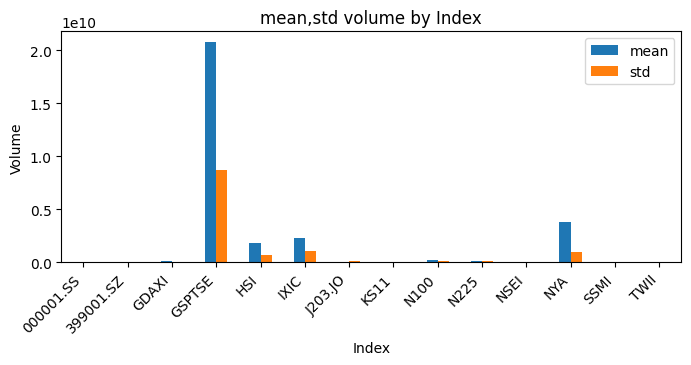

In [32]:
# Example: Univariate analysis using histograms and box plots
import matplotlib.pyplot as plt
import seaborn as sns

plot_var = ['mean', 'std']
idx_vol_group = df.groupby('Index')['Volume'].agg(plot_var).reset_index()

idx_vol_group.plot(kind='bar', figsize=(8, 3))
plt.title(f'{",".join(plot_var)} volume by Index')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.legend(plot_var)

# fetch the current ax object
ax = plt.gca()
ax.set_xticklabels(idx_vol_group['Index'], rotation=45, ha='right')

plt.show()

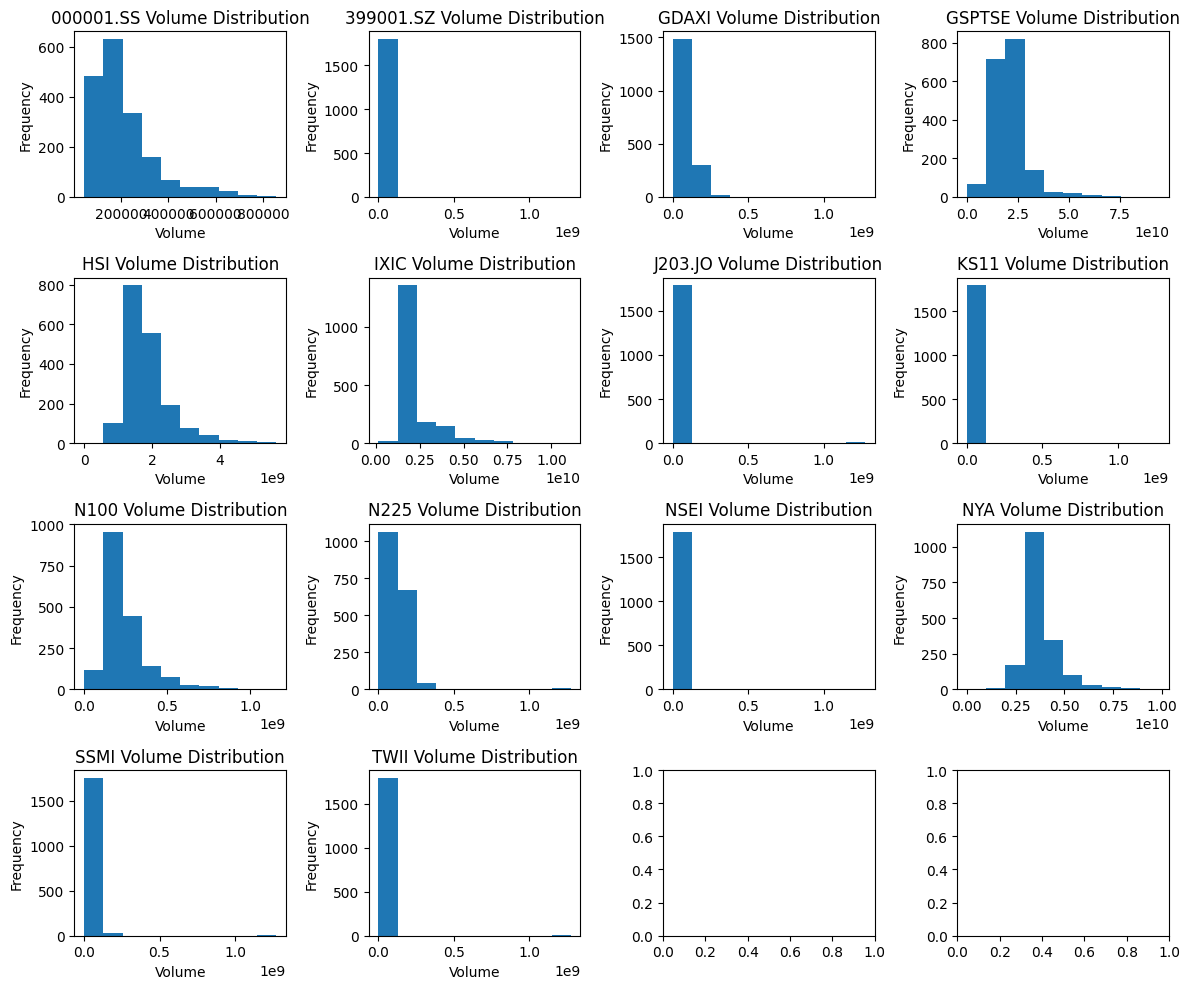

In [33]:
fig, ax = plt.subplots(4, 4, figsize=(12, 10))

# iterate over index
index_list = df['Index'].unique().tolist()
for i, (index, ax) in enumerate(zip(index_list, ax.flatten())):
    index_data = df[df['Index'] == index]['Volume']
    
    # histogram plot
    ax.hist(index_data, bins=10)
    ax.set_title(f"{index} Volume Distribution")
    
    # set labels
    ax.set_xlabel('Volume')
    ax.set_ylabel('Frequency')
    plt.tight_layout()

plt.show()

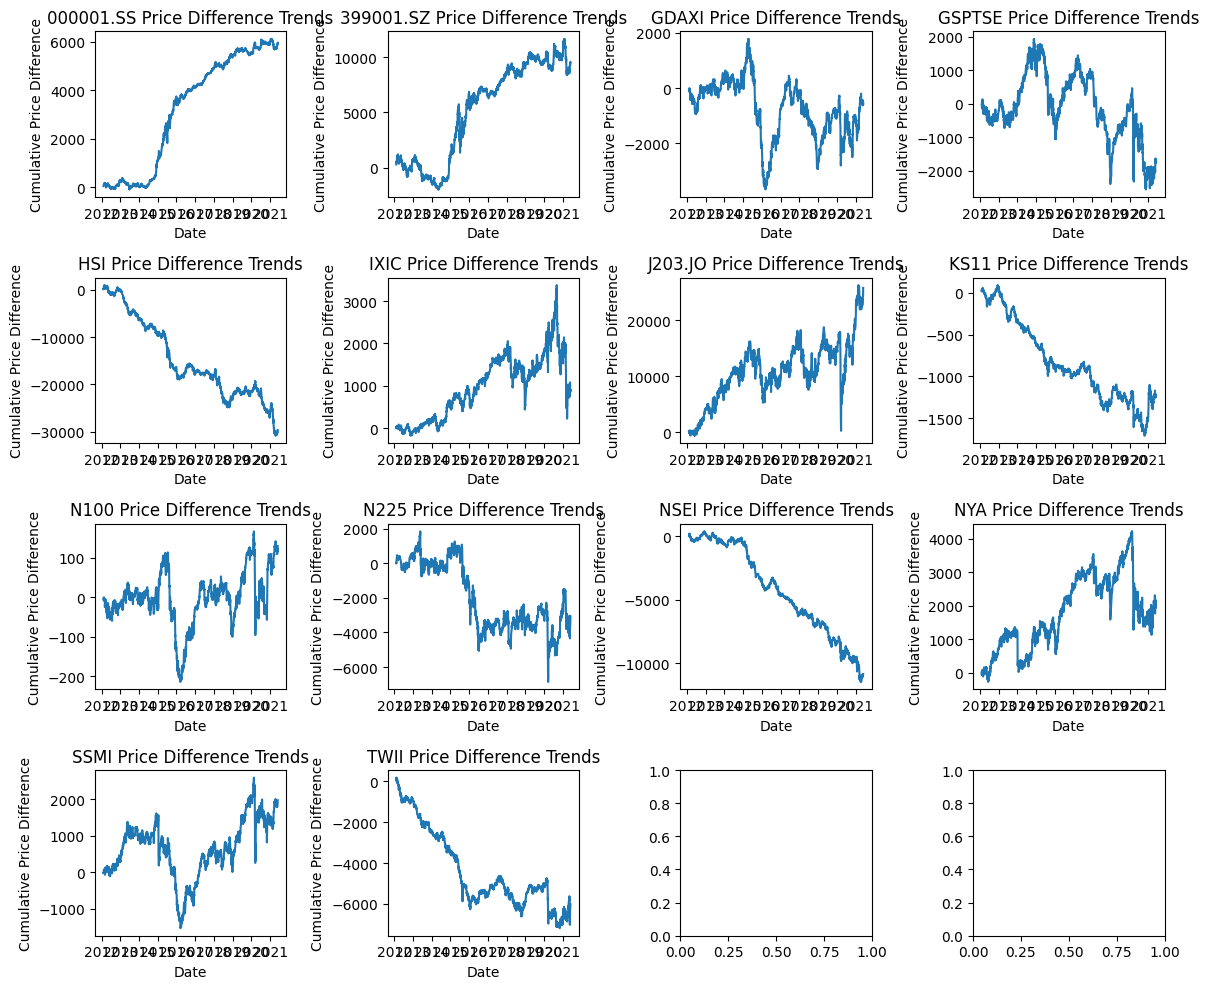

In [34]:
ig, ax = plt.subplots(4, 4, figsize=(12, 10))

# iterate over index
index_list = df['Index'].unique().tolist()
for i, (index, ax) in enumerate(zip(index_list, ax.flatten())):
    index_data = df[df['Index'] == index][['Date', 'Cum Price Difference']]
    
    # histogram plot
    ax.plot(index_data['Date'], index_data['Cum Price Difference'])
    ax.set_title(f"{index} Price Difference Trends")
    
    # set labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Price Difference')
    plt.tight_layout()

plt.show()

In [35]:
# Get columns with numeric types
numeric_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
print(numeric_columns)


['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Price Change', 'Lag_Close', 'Price Difference', 'Cum Price Difference', 'Daily Returns', 'Volatility', 'moving_volatility']


Text(0.5, 1.0, 'Correlation Heatmap')

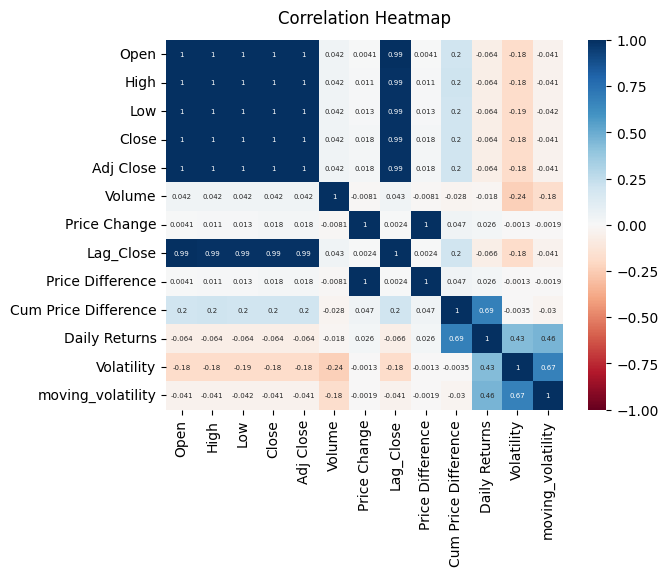

In [36]:
# Subset the dataframe to include only numeric columns and compute the correlation matrix
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

# Plot the heatmap
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap="RdBu", annot_kws={'fontsize': 5})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
